# Final Exam: Programming Project - [Covid-19 Data Pipeline] Fazrul Masrol

In this final project, I used RapidAPI's Restful `Covid-19 API`: An API that allows users to fetch real-time and historical statistics on the pandemic. I obtained the API from https://rapidapi.com/hub 

Covid-19 Data Pipeline:

I utilized one of the endpoints to retrieve the `real-time` status of the pandemic which are updated every 15 minutes, allowing users to obtain real-time representation of the Covid-19 cases. The endpoint was used as a base, and further specified the statistics on countries in `North America`. 
Real-time data displayed:
- Active cases
- Critical cases
- Recovered cases
- Total cases

`Code Content:`
1. Covid-19 WebAPi
2. Updating & correcting data
3. Analyzing results
4. Plotting
5. Status code and CSV conversion


## 1. Covid-19 WebAPI

In [1]:
# importing packages
import requests
import pandas as pd

# url endpoint and headers for covid-19 statistics
url = "https://covid-193.p.rapidapi.com/statistics"

headers = {
	"X-RapidAPI-Key": "2230fd0835msha2a346053c49e5ep18d097jsne6f015802970",
	"X-RapidAPI-Host": "covid-193.p.rapidapi.com"
}

# response
response = requests.request("GET", url, headers=headers)

res = response.json()

# for loop & retrieving relevant fields to display
covid_list = []
for stats in res["response"]:
    if stats["continent"] == "North-America":
        country = stats["country"]
        population = stats["population"]
        active_cases = stats["cases"]["active"]
        critical_cases = stats["cases"]["critical"]
        recovered_cases = stats["cases"]["recovered"]
        total_cases = stats["cases"]["total"]
        
        covid_list.append({"country":country,"population":population,"active_cases":active_cases,
                           "critical_cases":critical_cases,"recovered_cases":recovered_cases,"total_cases":total_cases})
                           
# building & displaying dataframe                          
dataf = pd.DataFrame.from_records(covid_list)

dataf


,country,population,active_cases,critical_cases,recovered_cases,total_cases
0,Antigua-and-Barbuda,99618.0,32.0,1.0,8597.0,8773
1,St-Vincent-Grenadines,111674.0,333.0,NaN,6641.0,7089
2,Saint-Kitts-and-Nevis,53983.0,33.0,NaN,6388.0,6467
3,Turks-and-Caicos,39808.0,29.0,4.0,6263.0,6328
4,British-Virgin-Islands,30650.0,NaN,1.0,NaN,7131
5,Greenland,56975.0,9189.0,4.0,2761.0,11971
6,Anguilla,15282.0,15.0,4.0,3595.0,3620
7,Saint-Pierre-Miquelon,5735.0,662.0,1.0,2449.0,3112
8,St-Barth,9940.0,NaN,NaN,NaN,5138
9,Montserrat,4998.0,28.0,NaN,1032.0,1068


## 2. Updating & correcting data
- "North America" is listed as a country which is an error that needs to be fixed.
- USA does not have a population, and this can be updated.
- After 08/03, Canada's stats for active and recovered cases became NULL, so I retrieved the most recent Canada numbers available from the API (08/02) and updated them here.

In [2]:
# Dropping "North-America" as a country
df = dataf.drop([39], axis=0)

# Resetting index
df_final = df.reset_index(drop=True)

# Updating missing USA population
df_final.at[34,"population"]=329500000  # population of USA obtained from Google

In [3]:
# Retrieving missing 'active cases' and 'recovered cases' for Canada based on most recent history (08/02) from history endpoint
url2 = "https://covid-193.p.rapidapi.com/history"

querystring = {"country":"Canada","day":"2022-08-02"}

response2 = requests.request("GET", url2, headers=headers, params=querystring)

res2 = response2.json()

print(res2)

{'get': 'history', 'parameters': {'country': 'Canada', 'day': '2022-08-02'}, 'errors': [], 'results': 1, 'response': [{'continent': 'North-America', 'country': 'Canada', 'population': 38428911, 'cases': {'new': None, 'active': 272926, 'critical': 195, 'recovered': 3695850, '1M_pop': '104410', 'total': 4012359}, 'deaths': {'new': None, '1M_pop': '1134', 'total': 43583}, 'tests': {'1M_pop': '1628635', 'total': 62586673}, 'day': '2022-08-02', 'time': '2022-08-02T00:00:02+00:00'}]}


In [4]:
# Updating missing active and recovered cases for Canada based on most recent history on history endpoint above
df_final.at[36,"active_cases"]=272926   # retrieved from most recent history on 08/02/2022
df_final.at[36,"recovered_cases"]=3695850  # retrieved from most recent history on 08/02/2022
df_final

,country,population,active_cases,critical_cases,recovered_cases,total_cases
0,Antigua-and-Barbuda,99618.0,32.0,1.0,8597.0,8773
1,St-Vincent-Grenadines,111674.0,333.0,NaN,6641.0,7089
2,Saint-Kitts-and-Nevis,53983.0,33.0,NaN,6388.0,6467
3,Turks-and-Caicos,39808.0,29.0,4.0,6263.0,6328
4,British-Virgin-Islands,30650.0,NaN,1.0,NaN,7131
5,Greenland,56975.0,9189.0,4.0,2761.0,11971
6,Anguilla,15282.0,15.0,4.0,3595.0,3620
7,Saint-Pierre-Miquelon,5735.0,662.0,1.0,2449.0,3112
8,St-Barth,9940.0,NaN,NaN,NaN,5138
9,Montserrat,4998.0,28.0,NaN,1032.0,1068


## 3. Analyzing results

Following extracted info include:
- Minimum of total cases in North America
- Maximum of total cases in North America
- Mean of total cases in North America
- Highest population

The same analyses can be made for other fields such as active, critical, and recovered cases

In [5]:
# Country with most total cases

df_final[df_final.total_cases == df_final.total_cases.max()]

,country,population,active_cases,critical_cases,recovered_cases,total_cases
34,USA,329500000.0,3971948.0,4627.0,88568143.0,93597363


In [6]:
# Country with least total cases

df_final[df_final.total_cases == df_final.total_cases.min()]

,country,population,active_cases,critical_cases,recovered_cases,total_cases
9,Montserrat,4998.0,28.0,NaN,1032.0,1068


In [7]:
# Mean number of total cases

cases_mean = df_final.total_cases.mean()

print(f'The mean value for total cases is: {cases_mean:.2f}')

The mean value for total cases is: 2848556.00


In [8]:
# Country with highest population

df_final[df_final.population == df_final.population.max()]

,country,population,active_cases,critical_cases,recovered_cases,total_cases
34,USA,329500000.0,3971948.0,4627.0,88568143.0,93597363


In [9]:
# Percentage of active vs total cases in the USA
# Percentage of recovered vs total cases in the USA

USA_active = df_final.iloc[[34],2]
USA_recovered = df_final.iloc[[34],4]
USA_total = df_final.iloc[[34],5]

perc_active = (USA_active / USA_total) * 100
perc_recover = (USA_recovered / USA_total) * 100

print(f'The % of active cases vs total cases in the USA is {perc_active.to_string(index=False)} %')
print(f'The % of recovered cases vs total cases in the USA is {perc_recover.to_string(index=False)} %')

The % of active cases vs total cases in the USA is 4.243654 %
The % of recovered cases vs total cases in the USA is 94.62675 %


## 4. Plotting
Below plot displays the active, critical, recovered, and total cases of Mexico, Canada, and USA

In [10]:
# Specifying countries with highest cases

df_countries = df_final.loc[[34, 35, 36]] # retrieving USA, Mexico, Canada stats
df_countries

,country,population,active_cases,critical_cases,recovered_cases,total_cases
34,USA,329500000.0,3971948.0,4627.0,88568143.0,93597363
35,Mexico,131755213.0,511047.0,4798.0,5964137.0,6803190
36,Canada,38431621.0,272926.0,195.0,3695850.0,4056133


<AxesSubplot:title={'center':'Covid19 Cases in USA, Mexico, Canada'}, xlabel='country'>

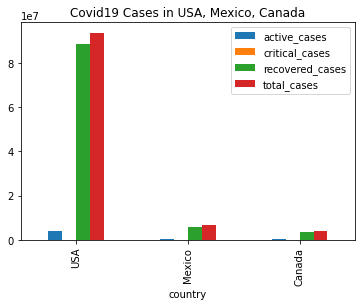

In [11]:
# Displaying the plot of active, critical, recovered, and total cases of those countries

df_countries.plot(kind = 'bar', title = 'Covid19 Cases in USA, Mexico, Canada',
                  x = "country", y = ["active_cases", "critical_cases", "recovered_cases", "total_cases"])

## 5. Status code and CSV conversion

In [12]:
# retrieving HTTP status code

response.status_code

200

In [13]:
# Saving data to a csv file

df_final.to_csv('covid-19.csv')